In [4]:
import numpy as np

# 2 x 16 matrix of zeros
# normalize A to range [[-3.5, 3.5], [-3.5, 3.5]]
ax = list(np.linspace(-3.5, 3.5, 16))
A = np.zeros((64, 2), dtype=np.float32)
for row in range(64):
    A[row, 0] = ax[row // 4]
    A[row, 1] = ax[row % 16]
A

array([[-3.5       , -3.5       ],
       [-3.5       , -3.0333333 ],
       [-3.5       , -2.5666666 ],
       [-3.5       , -2.1       ],
       [-3.0333333 , -1.6333333 ],
       [-3.0333333 , -1.1666666 ],
       [-3.0333333 , -0.7       ],
       [-3.0333333 , -0.23333333],
       [-2.5666666 ,  0.23333333],
       [-2.5666666 ,  0.7       ],
       [-2.5666666 ,  1.1666666 ],
       [-2.5666666 ,  1.6333333 ],
       [-2.1       ,  2.1       ],
       [-2.1       ,  2.5666666 ],
       [-2.1       ,  3.0333333 ],
       [-2.1       ,  3.5       ],
       [-1.6333333 , -3.5       ],
       [-1.6333333 , -3.0333333 ],
       [-1.6333333 , -2.5666666 ],
       [-1.6333333 , -2.1       ],
       [-1.1666666 , -1.6333333 ],
       [-1.1666666 , -1.1666666 ],
       [-1.1666666 , -0.7       ],
       [-1.1666666 , -0.23333333],
       [-0.7       ,  0.23333333],
       [-0.7       ,  0.7       ],
       [-0.7       ,  1.1666666 ],
       [-0.7       ,  1.6333333 ],
       [-0.23333333,

In [5]:
x = np.array([-2, -2], dtype=int)
x

array([-2, -2])

In [6]:
num_harmonics = 64

def gen_signal_from_matmul(A, x, rate, dur):
    weights = A @ x
    norm = np.linalg.norm(weights)
    weights = weights / norm
    frame = np.fft.irfft(weights, n=(int(rate * dur)))
    frame = np.real(frame)
    if np.max(np.abs(frame)) > 0:
        frame = frame / np.max(np.abs(frame)) * 0.9
    return frame

In [7]:
sample_rate = 44100
duration = 0.5

frame = gen_signal_from_matmul(A, x, sample_rate, duration)

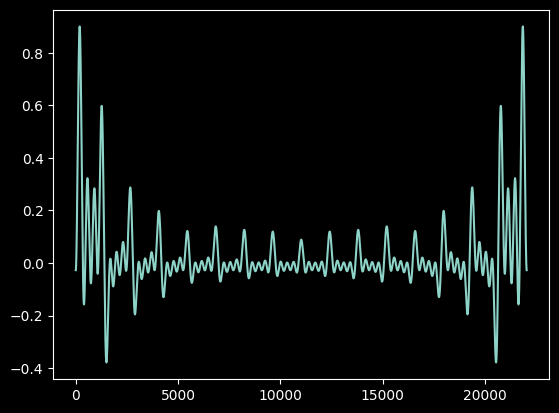

In [8]:
# plot the frame
import matplotlib.pyplot as plt
plt.plot(frame)

In [9]:
import sounddevice as sd

output = np.array([], dtype=np.float32)
for x in range(-4, 5, 2):
    for y in range(-4, 5):
        X = np.array([x, y], dtype=int)
        print(X)
        frame = gen_signal_from_matmul(A, X, sample_rate, duration)
        output = np.concatenate((output, frame))
    if x < 2:
        for y in reversed(range(-4, 5)):
            X = np.array([x+1, y], dtype=int)
            print(X)
            frame = gen_signal_from_matmul(A, X, sample_rate, duration)
            output = np.concatenate((output, frame))

sd.play(output * 100, sample_rate)
sd.wait()

[-4 -4]
[-4 -3]
[-4 -2]
[-4 -1]
[-4  0]
[-4  1]
[-4  2]
[-4  3]
[-4  4]
[-3  4]
[-3  3]
[-3  2]
[-3  1]
[-3  0]
[-3 -1]
[-3 -2]
[-3 -3]
[-3 -4]
[-2 -4]
[-2 -3]
[-2 -2]
[-2 -1]
[-2  0]
[-2  1]
[-2  2]
[-2  3]
[-2  4]
[-1  4]
[-1  3]
[-1  2]
[-1  1]
[-1  0]
[-1 -1]
[-1 -2]
[-1 -3]
[-1 -4]
[ 0 -4]
[ 0 -3]
[ 0 -2]
[ 0 -1]
[0 0]
[0 1]
[0 2]
[0 3]
[0 4]
[1 4]
[1 3]
[1 2]
[1 1]
[1 0]
[ 1 -1]
[ 1 -2]
[ 1 -3]
[ 1 -4]
[ 2 -4]
[ 2 -3]
[ 2 -2]
[ 2 -1]
[2 0]
[2 1]
[2 2]
[2 3]
[2 4]
[ 4 -4]
[ 4 -3]
[ 4 -2]
[ 4 -1]


C:\Users\jwest\AppData\Local\Temp\ipykernel_1824\3964381369.py:6: RuntimeWarning: invalid value encountered in divide
  weights = weights / norm


[4 0]
[4 1]
[4 2]
[4 3]
[4 4]
